# Parkinson's Disease

Parkinson's disease is a progressive disorder that affects the nervous system and the parts of the body controlled by the nerves. Symptoms start slowly. The first symptom may be a barely noticeable tremor in just one hand. Tremors are common, but the disorder may also cause stiffness or slowing of movement.

In the early stages of Parkinson's disease, your face may show little or no expression. Your arms may not swing when you walk. Your speech may become soft or slurred. Parkinson's disease symptoms worsen as your condition progresses over time.

Although Parkinson's disease can't be cured, medications might significantly improve your symptoms. Occasionally, your health care provider may suggest surgery to regulate certain regions of your brain and improve your symptoms.

# Import Dependencies

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.metrics import classification_report,confusion_matrix
import pickle

# Import Data

In [5]:
dataset=pd.read_csv("Parkinson's_Disease.csv")

# About Dataset

This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

The data is in ASCII CSV format. The rows of the CSV file contain an instance corresponding to one voice recording. There are around six recordings per patient, the name of the patient is identified in the first column.For further information or to pass on comments, please contact Max Little (little '@' robots.ox.ac.uk).

Further details are contained in the following reference -- if you use this dataset, please cite:
Max A. Little, Patrick E. McSharry, Eric J. Hunter, Lorraine O. Ramig (2008), 'Suitability of dysphonia measurements for telemonitoring of Parkinson's disease', IEEE Transactions on Biomedical Engineering (to appear).

# EDA

# Attribute Information of Dataset

1) name - ASCII subject name and recording number
2) MDVP:Fo(Hz) - Average vocal fundamental frequency
3) MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
4) MDVP:Flo(Hz) - Minimum vocal fundamental frequency
5) MDVP:Jitter(%), MDVP:Jitter(Abs), MDVP:RAP, MDVP:PPQ, Jitter:DDP - Several measures of variation in fundamental frequency
6) MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
7) NHR, HNR - Two measures of the ratio of noise to tonal components in the voice
8) status - The health status of the subject (one) - Parkinson's, (zero) - healthy
9) RPDE, D2 - Two nonlinear dynamical complexity measures
10 DFA - Signal fractal scaling exponent
11) spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation

In [6]:
dataset.shape

(195, 24)

In [7]:
dataset.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [9]:
#checking the data type of each column
dataset.dtypes

name                 object
MDVP:Fo(Hz)         float64
MDVP:Fhi(Hz)        float64
MDVP:Flo(Hz)        float64
MDVP:Jitter(%)      float64
MDVP:Jitter(Abs)    float64
MDVP:RAP            float64
MDVP:PPQ            float64
Jitter:DDP          float64
MDVP:Shimmer        float64
MDVP:Shimmer(dB)    float64
Shimmer:APQ3        float64
Shimmer:APQ5        float64
MDVP:APQ            float64
Shimmer:DDA         float64
NHR                 float64
HNR                 float64
status                int64
RPDE                float64
DFA                 float64
spread1             float64
spread2             float64
D2                  float64
PPE                 float64
dtype: object

In [10]:
dataset.drop(columns=['name'],inplace=True)

In [11]:
dataset.shape

(195, 23)

In [14]:
dataset.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
158,126.144,154.284,97.543,0.00975,0.000080,0.00593,0.00454,0.01778,0.02852,0.266,...,0.04499,0.03828,21.534,1,0.635015,0.627337,-5.070096,0.280091,2.892300,0.249703
9,95.056,120.103,91.226,0.00532,0.000060,0.00268,0.00332,0.00803,0.02838,0.255,...,0.04324,0.01022,21.862,1,0.547037,0.798463,-5.011879,0.325996,2.432792,0.271362
150,186.695,211.961,149.442,0.01872,0.000100,0.01075,0.01154,0.03225,0.05830,0.784,...,0.08096,0.10952,12.529,1,0.507826,0.762726,-4.484303,0.340256,2.958815,0.301487
107,151.884,157.765,133.751,0.00258,0.000020,0.00115,0.00122,0.00346,0.01450,0.137,...,0.01898,0.00659,26.833,1,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306
47,252.455,261.487,182.786,0.00185,0.000007,0.00092,0.00113,0.00276,0.01152,0.103,...,0.01841,0.00432,26.805,0,0.610367,0.635204,-7.319510,0.200873,2.028612,0.086398


In [20]:
dataset.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,...,-0.094732,-0.021981,0.059144,-0.383535,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,...,-0.003733,0.163766,-0.024893,-0.166136,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,...,-0.150737,-0.108670,0.210851,-0.380200,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,...,0.746635,0.906959,-0.728165,0.278220,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,...,0.697170,0.834972,-0.656810,0.338653,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,...,0.744919,0.919521,-0.721543,0.266668,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,...,0.763592,0.844604,-0.731510,0.288698,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,...,0.744901,0.919548,-0.721494,0.266646,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,...,0.987626,0.722194,-0.835271,0.367430,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,...,0.963202,0.744477,-0.827805,0.350697,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058


In [15]:
#checking for null values in the dataset
dataset.isna().sum()

MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [17]:
status1,status0=dataset['status'].value_counts()

[Text(0, 0, '147'), Text(0, 0, '48')]

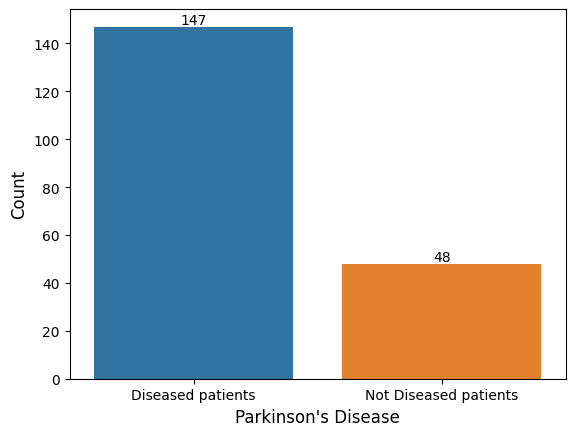

In [19]:
ax=sns.barplot(x=['Diseased patients',"Not Diseased patients"],y=[status1,status0])
plt.xlabel("Parkinson's Disease",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

# over sampling

In [24]:
Not_Diseased_patients=dataset[dataset['status']==0]
Diseased_patients=dataset[dataset['status']==1]
print("Not_Diseased_patients",len(Not_Diseased_patients))
print("Diseased_patients",len(Diseased_patients))

Not_Diseased_patients 48
Diseased_patients 147


In [25]:
new_Not_Diseased_patients=Not_Diseased_patients.sample(len(Diseased_patients),replace=True)

In [27]:
dataset1=pd.concat([Diseased_patients,new_Not_Diseased_patients])

In [29]:
dataset1.sample(5)

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
107,151.884,157.765,133.751,0.00258,0.000020,0.00115,0.00122,0.00346,0.01450,0.137,...,0.01898,0.00659,26.833,1,0.393563,0.700246,-6.600023,0.249172,2.499148,0.105306
12,136.926,159.866,131.276,0.00293,0.000020,0.00118,0.00153,0.00355,0.01259,0.112,...,0.01968,0.00581,25.703,1,0.460600,0.646846,-6.547148,0.152813,2.041277,0.138512
42,237.226,247.326,225.227,0.00298,0.000010,0.00169,0.00182,0.00507,0.01752,0.164,...,0.03104,0.00740,22.736,0,0.305062,0.654172,-7.310550,0.098648,2.416838,0.095032
181,148.462,161.078,141.998,0.00397,0.000030,0.00202,0.00235,0.00605,0.01831,0.163,...,0.02849,0.00639,22.866,1,0.408598,0.768845,-5.704053,0.216204,2.679185,0.197710
64,229.401,252.221,221.156,0.00205,0.000009,0.00114,0.00113,0.00342,0.01457,0.129,...,0.02308,0.00300,26.415,0,0.276850,0.673636,-7.496264,0.056844,2.003032,0.073581


In [30]:
dataset1.shape

(294, 23)

In [31]:
status1,status0=dataset1['status'].value_counts()

[Text(0, 0, '147'), Text(0, 0, '147')]

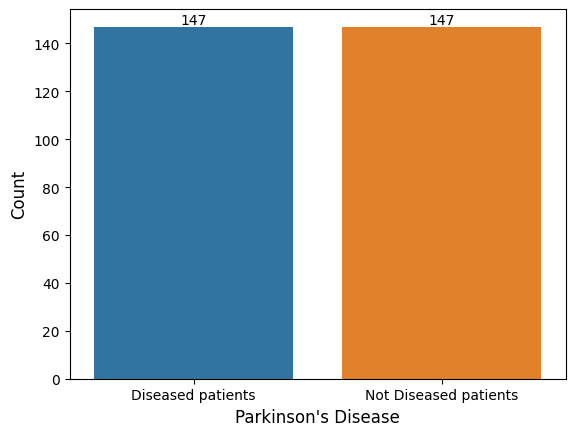

In [32]:
ax=sns.barplot(x=['Diseased patients',"Not Diseased patients"],y=[status1,status0])
plt.xlabel("Parkinson's Disease",size=12)
plt.ylabel("Count",size=12)
ax.bar_label(ax.containers[0])

# Spliting the data for training and testing

In [34]:
Data=dataset1.drop(columns=['status'])
Target=dataset1['status']

In [35]:
xtrain,xtest,ytrain,ytest=train_test_split(Data,Target,test_size=0.2)

In [36]:
print(f"The shape of xtrain is {xtrain.shape}")
print(f"The shape of ytrain is {ytrain.shape}")
print(f"The shape of xtest is {xtest.shape}")
print(f"The shape of ytest is {ytest.shape}")

The shape of xtrain is (235, 22)
The shape of ytrain is (235,)
The shape of xtest is (59, 22)
The shape of ytest is (59,)


# Linear Regression

BY using LinearRegression Algorithm we get the accuray of 38.41%
              precision    recall  f1-score   support

           0       0.62      1.00      0.76        34
           1       1.00      0.16      0.28        25

    accuracy                           0.64        59
   macro avg       0.81      0.58      0.52        59
weighted avg       0.78      0.64      0.56        59



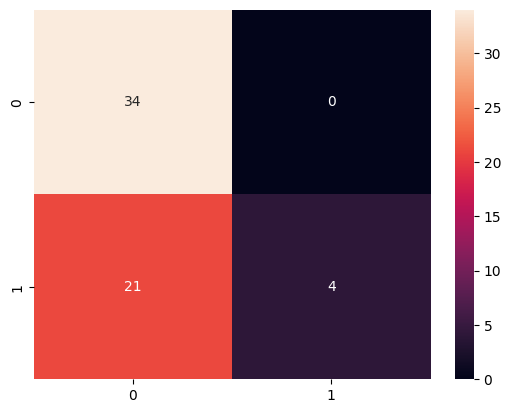

In [37]:
model_lr=LinearRegression()
model_lr.fit(xtrain,ytrain)
result=model_lr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using LinearRegression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Logistic Regression

BY using Logistic Regression Algorithm we get the accuray of 67.8%
              precision    recall  f1-score   support

           0       0.80      0.59      0.68        34
           1       0.59      0.80      0.68        25

    accuracy                           0.68        59
   macro avg       0.69      0.69      0.68        59
weighted avg       0.71      0.68      0.68        59



C:\Users\VENKTESH DALAVAYI\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


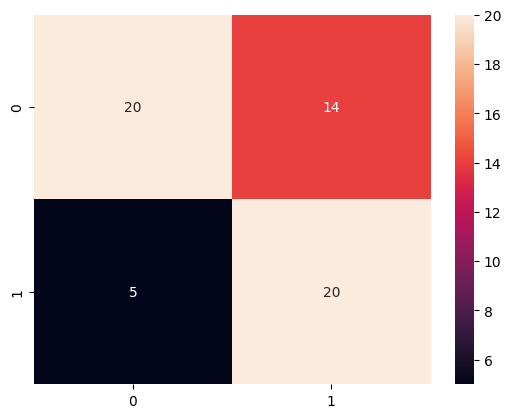

In [39]:
model_lrr=LogisticRegression()
model_lrr.fit(xtrain,ytrain)
result=model_lrr.score(xtest,ytest)
accuracy=result*100
predicted_values=model_lrr.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Logistic Regression Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Decision Tree Classifier

BY using Decision Tree Classifier Algorithm we get the accuray of 93.22%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94        34
           1       1.00      0.84      0.91        25

    accuracy                           0.93        59
   macro avg       0.95      0.92      0.93        59
weighted avg       0.94      0.93      0.93        59



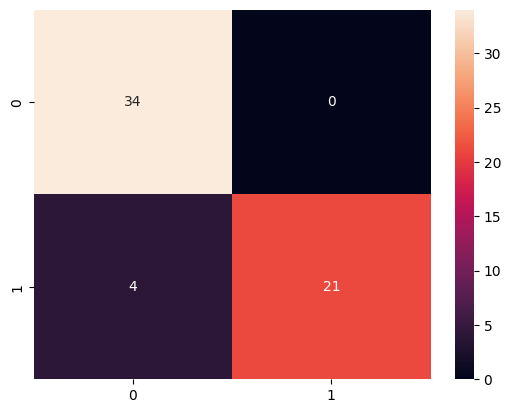

In [40]:
model_dt=DecisionTreeClassifier()
model_dt.fit(xtrain,ytrain)
result=model_dt.score(xtest,ytest)
accuracy=result*100
predicted_values=model_dt.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Decision Tree Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Random Forest Classifier

BY using Random Forest Classifier Algorithm we get the accuray of 96.61%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.92      0.96        25

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



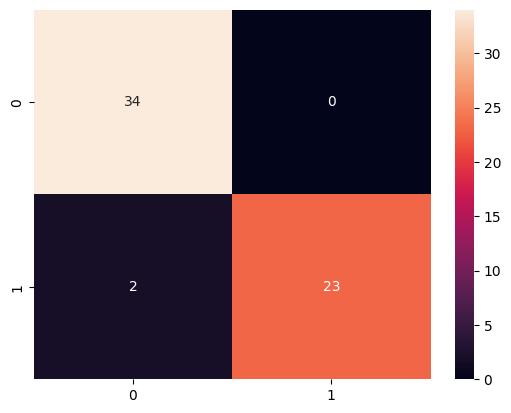

In [59]:
model_rf=RandomForestClassifier(n_estimators=100)
model_rf.fit(xtrain,ytrain)
result=model_rf.score(xtest,ytest)
accuracy=result*100
predicted_values=model_rf.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using Random Forest Classifier Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# SVC

BY using SVC Algorithm we get the accuray of 98.31%
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        34
           1       1.00      0.96      0.98        25

    accuracy                           0.98        59
   macro avg       0.99      0.98      0.98        59
weighted avg       0.98      0.98      0.98        59



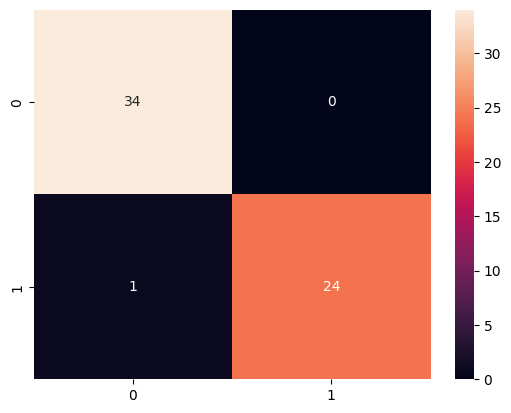

In [53]:

model_svc=SVC(C=10,gamma=0.01)
model_svc.fit(xtrain,ytrain)
result=model_svc.score(xtest,ytest)
accuracy=result*100
predicted_values=model_svc.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using SVC Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# knn

BY using knn Algorithm we get the accuray of 96.61%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.92      0.96        25

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



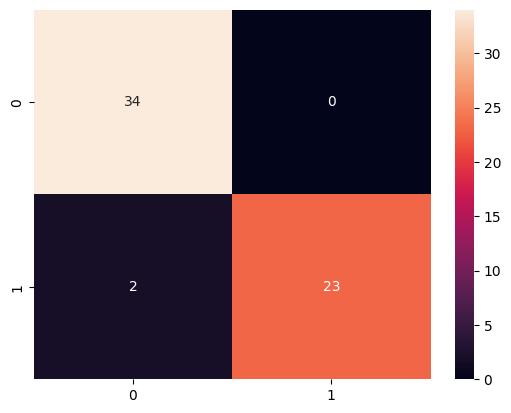

In [70]:
model_knn=KNeighborsClassifier(n_neighbors=1)
model_knn.fit(xtrain,ytrain)
result=model_knn.score(xtest,ytest)
accuracy=result*100
predicted_values=model_knn.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using knn Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# xgboost


BY using xgboost Algorithm we get the accuray of 96.61%
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.92      0.96        25

    accuracy                           0.97        59
   macro avg       0.97      0.96      0.96        59
weighted avg       0.97      0.97      0.97        59



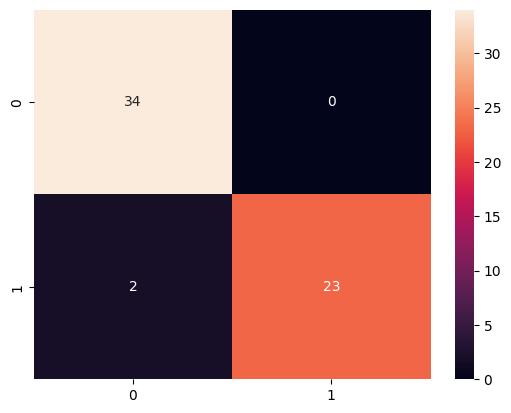

In [62]:
model_xgb=xgb.XGBClassifier(learning_rate=0.1)
model_xgb.fit(xtrain,ytrain)
result=model_xgb.score(xtest,ytest)
accuracy=result*100
predicted_values=model_xgb.predict(xtest)
predicted_values=predicted_values.astype(int)
con_matrix=confusion_matrix(ytest,predicted_values)
sns.heatmap(con_matrix,annot=True)
print(f"BY using xgboost Algorithm we get the accuray of {np.round(accuracy,2)}%")
print(classification_report(ytest,predicted_values))

# Visualising the accuracy of each Algorithm

[Text(0, 0, '38.41'),
 Text(0, 0, '67.8'),
 Text(0, 0, '93.22'),
 Text(0, 0, '96.61'),
 Text(0, 0, '98.31'),
 Text(0, 0, '96.61'),
 Text(0, 0, '96.61')]

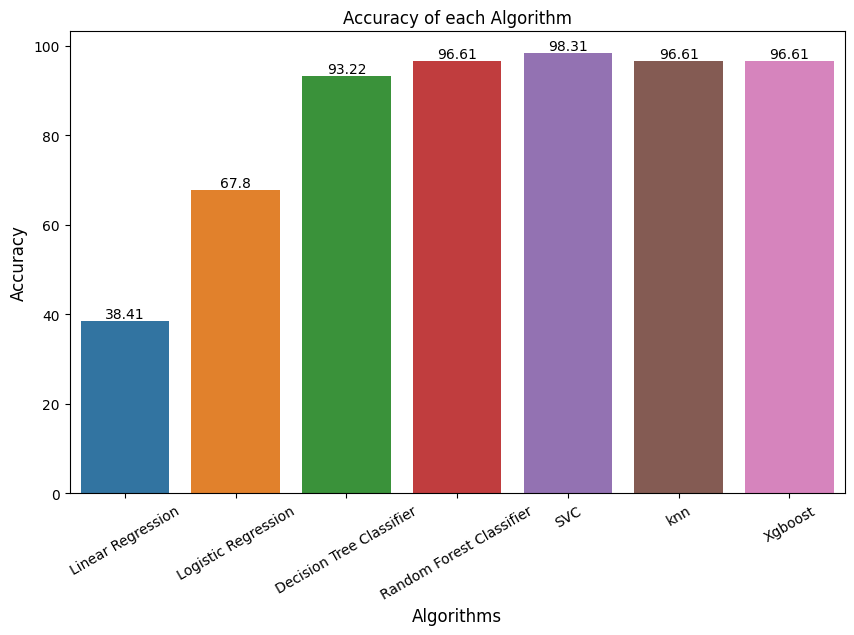

In [71]:
plt.subplots(figsize=(10,6))
ax=sns.barplot(x=["Linear Regression","Logistic Regression","Decision Tree Classifier","Random Forest Classifier","SVC","knn","Xgboost"],y=[38.41,67.8,93.22,96.61,98.31,96.61,96.61])
plt.xticks(rotation=30)
plt.title("Accuracy of each Algorithm")
plt.xlabel("Algorithms",size=12)
plt.ylabel("Accuracy",size=12)
ax.bar_label(ax.containers[0])

we can seen in the above graph that SVC has highest Accuracy of 98.31%

In [74]:
pickle.dump(model_svc,open("Parkinson's_Disease.p","wb"))